<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2019 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Tópico 0">Questão 1</a></li>
        <li><a href="#Tópico 1">Questão 2</a></li>
        <li><a href="#Tópico 2">Questão 3</a></li>
        <li><a href="#Tópico 3">Questão 4</a></li>

</ol>
</div>


<div id="Tópico 0">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 1: Considerando os índices do grupo Setorial ou por Segmento, escolha 5 (cinco) índices e colete os preços diários (OHLC), assim como os volumes, dos 3 (três) papéis mais negociados (líquidos) em cada um dos 5 índices durante um período de 24 meses.
</h></a></h>   
</div> </div> 
http://www.bmfbovespa.com.br/pt_br/produtos/indices/

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_finance import candlestick_ohlc
import datetime
import pandas_datareader.data as pdr
import pickle
import datetime as dt
from scipy import signal


In [2]:
import matplotlib.dates as mdates
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

def retira_colunas_nan(df):
    newdf = None
    for i in range(len(df['Close'].columns)):
        if df['Close'].iloc[:,i].isna().sum() < 100:
            newdf=pd.concat([newdf,df['Close'].iloc[:,i]],axis=1) 
    return newdf

def ordena_acoes_por_diferenca_de_preco(df):
    resultado = {}
    for i in range(len(df.columns)):
        diferenca = df.iloc[-1,i] - df.iloc[0,i]
        resultado.update({df.iloc[0:i].columns[i]: diferenca})
        
    dict_ordered = sorted(resultado.items(), key=lambda x: x[1], reverse=True)
    
    for i in dict_ordered.value:
        if dict_ordered[i]<0:
            del dict_ordered[i]
            
    print(dict_ordered)

def cria_stocks_all(df):
    Stocks=df.values[:-2]
    N_months=24
    Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
    
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    
    return stocks_all

def seleciona_acoes_crescentes(df):
    resultado = {}
    for i in range(len(df.columns)):
        diferenca = df.iloc[-1,i] - df.iloc[0,i]
        if diferenca > 0:
            resultado.update({df.iloc[0:i].columns[i]: diferenca})
        
    dict_crescentes = sorted(resultado.items(), key=lambda x: x[1], reverse=True) 

    return dict_crescentes

def seleciona_ativos_por_volume(dict_crescentes, stocks_all):
    dict_volume = {}
    for i in range(len(dict_crescentes)):
        dict_volume.update({dict_crescentes[i][0]: stocks_all['Volume'][dict_crescentes[i][0]].sum()}) 

    dict_volume_ordered = sorted(dict_volume.items(), key=lambda x: x[1], reverse=True) 
    dict_volume_ordered[:3]
    
    nome_acoes = []
    for i in dict_volume_ordered[:3]:
        nome_acoes.append(i[0])
        
    return nome_acoes


In [12]:
#Os dados foram baixados no site http://www.bmfbovespa.com.br/pt_br/produtos/indices/

# Lendo dados do indice IMOB
dfIMOB = pd.read_csv('./IMOBdata.csv')
dfIMOB = dfIMOB['Código\xa0']

stocks_all_IMOB = cria_stocks_all(dfIMOB)
stocks_all_IMOB_clean = retira_colunas_nan(stocks_all_IMOB)
dict_crescentes_IMOB = seleciona_acoes_crescentes(stocks_all_IMOB_clean.dropna())
nome_acoes_IMOB = seleciona_ativos_por_volume(dict_crescentes_IMOB, stocks_all_IMOB)

df_selecionadas_IMOB = pd.DataFrame()
for i in range(len(nome_acoes_IMOB)):
    df_selecionadas_IMOB = pd.concat([df_selecionadas_IMOB,stocks_all_IMOB['Close'][nome_acoes_IMOB[i]]],axis=1) 

df_selecionadas_IMOB

[*********************100%***********************]  14 of 14 downloaded


,BRML3.SA,MRVE3.SA,CYRE3.SA
2017-10-02,14.09,12.45,13.76
2017-10-03,14.39,12.77,14.12
2017-10-04,14.30,12.96,14.07
2017-10-05,13.94,12.67,14.33
2017-10-06,13.80,12.71,14.01
2017-10-09,13.90,12.75,13.80
2017-10-10,13.97,12.91,14.21
2017-10-11,14.01,13.01,14.33
2017-10-12,14.01,13.01,14.33
2017-10-13,14.00,13.16,14.26


In [13]:
# Lendo dados do indice IDIV
dfIDIV = pd.read_csv('./IDIVdata.csv')
dfIDIV = dfIDIV['Código\xa0']

stocks_all_IDIV = cria_stocks_all(dfIDIV)
stocks_all_IDIV_clean = retira_colunas_nan(stocks_all_IDIV)
dict_crescentes_IDIV = seleciona_acoes_crescentes(stocks_all_IDIV_clean.dropna())
nome_acoes_IDIV = seleciona_ativos_por_volume(dict_crescentes_IDIV,stocks_all_IDIV)

df_selecionadas_IDIV = pd.DataFrame()
for i in range(len(nome_acoes_IDIV)):
     df_selecionadas_IDIV = pd.concat([df_selecionadas_IDIV,stocks_all_IDIV['Close'][nome_acoes_IDIV[i]]],axis=1) 
    
df_selecionadas_IDIV


[*********************100%***********************]  29 of 29 downloaded


,ITSA4.SA,ITUB4.SA,BBSE3.SA
2017-10-02,9.96,28.94,28.29
2017-10-03,10.35,29.93,28.52
2017-10-04,10.28,29.67,29.12
2017-10-05,10.35,30.14,29.30
2017-10-06,10.30,29.79,29.05
2017-10-09,10.15,29.43,29.00
2017-10-10,10.35,30.07,29.12
2017-10-11,10.33,30.00,29.10
2017-10-12,10.33,30.00,29.10
2017-10-13,10.32,29.75,29.15


In [5]:
# Lendo dados do indice ICON
dfICON = pd.read_csv('ICONdata.csv')
dfICON = dfICON['Código\xa0']

stocks_all_ICON = cria_stocks_all(dfICON)
stocks_all_ICON_clean = retira_colunas_nan(stocks_all_ICON)
dict_crescentes_ICON = seleciona_acoes_crescentes(stocks_all_ICON_clean.dropna())
nome_acoes_ICON = seleciona_ativos_por_volume(dict_crescentes_ICON, stocks_all_ICON)
df_selecionadas_ICON = pd.DataFrame()
for i in range(len(nome_acoes_ICON)):
    df_selecionadas_ICON = pd.concat([df_selecionadas_ICON,stocks_all_ICON['Close'][nome_acoes_ICON[i]]],axis=1) 
    
df_selecionadas_ICON


[*********************100%***********************]  54 of 54 downloaded


,MGLU3.SA,VVAR3.SA,JBSS3.SA
2017-10-02,9.73,7.99,8.67
2017-10-03,9.87,8.19,8.80
2017-10-04,9.94,8.35,8.78
2017-10-05,9.80,8.05,8.77
2017-10-06,9.96,8.18,8.57
2017-10-09,9.72,8.02,8.42
2017-10-10,9.95,8.21,8.49
2017-10-11,9.62,8.03,8.60
2017-10-12,9.62,8.03,8.60
2017-10-13,9.09,7.56,8.65


In [6]:
# Lendo dados do indice IEE
dfIEE = pd.read_csv('./IEEdata.csv')
dfIEE = dfIEE['Código\xa0']

stocks_all_IEE = cria_stocks_all(dfIEE)
stocks_all_IEE_clean = retira_colunas_nan(stocks_all_IEE)
dict_crescentes_IEE = seleciona_acoes_crescentes(stocks_all_IEE_clean)
nome_acoes_IEE = seleciona_ativos_por_volume(dict_crescentes_IEE, stocks_all_IEE)

df_selecionadas_IEE = pd.DataFrame()
for i in range(len(nome_acoes_IEE)):
    df_selecionadas_IEE = pd.concat([df_selecionadas_IEE,stocks_all_IEE['Close'][nome_acoes_IEE[i]]],axis=1) 
    
df_selecionadas_IEE


[*********************100%***********************]  15 of 15 downloaded


,CMIG4.SA,ELET3.SA,ENBR3.SA
2017-10-02,7.72,20.54,15.00
2017-10-03,8.16,21.80,15.16
2017-10-04,7.96,21.85,15.37
2017-10-05,8.13,21.47,15.40
2017-10-06,8.01,20.81,15.35
2017-10-09,7.99,20.72,15.24
2017-10-10,8.09,21.30,15.59
2017-10-11,8.10,21.03,15.49
2017-10-12,8.10,21.03,15.49
2017-10-13,8.12,21.02,15.56


In [7]:
# Lendo dados do indice INDX
dfINDX = pd.read_csv('./INDXdata.csv')
dfINDX = dfINDX['Código\xa0']

stocks_all_INDX = cria_stocks_all(dfINDX)
stocks_all_INDX_clean = retira_colunas_nan(stocks_all_INDX)
dict_crescentes_INDX = seleciona_acoes_crescentes(stocks_all_INDX_clean)
nome_acoes_INDX = seleciona_ativos_por_volume(dict_crescentes_INDX, stocks_all_INDX)

df_selecionadas_INDX = pd.DataFrame()
for i in range(len(nome_acoes_INDX)):
    df_selecionadas_INDX = pd.concat([df_selecionadas_INDX,stocks_all_INDX['Close'][nome_acoes_INDX[i]]],axis=1) 
    
df_selecionadas_INDX


[*********************100%***********************]  41 of 41 downloaded


,GOAU4.SA,GGBR4.SA,CSNA3.SA
2017-10-02,5.33,11.00,9.88
2017-10-03,5.62,11.40,10.86
2017-10-04,5.70,11.37,10.76
2017-10-05,5.45,11.08,10.53
2017-10-06,5.34,10.76,10.25
2017-10-09,5.37,10.70,9.90
2017-10-10,5.66,11.15,10.00
2017-10-11,5.57,11.02,9.65
2017-10-12,5.57,11.02,9.65
2017-10-13,5.67,11.44,10.22


In [14]:
#MATRIZ DE CORRELAÇÃO COM OS 15 ATIVOS
df_selecionadas = pd.concat([df_selecionadas_IEE,df_selecionadas_INDX,df_selecionadas_ICON,df_selecionadas_IDIV,df_selecionadas_IMOB],axis=1)
Correlacao15 = df_selecionadas.corr()
Correlacao15

,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,GGBR4.SA,CSNA3.SA,MGLU3.SA,VVAR3.SA,JBSS3.SA,ITSA4.SA,ITUB4.SA,BBSE3.SA,BRML3.SA,MRVE3.SA,CYRE3.SA
CMIG4.SA,1.000000,0.911723,0.849505,0.111022,0.029310,0.796990,0.860064,-0.503217,0.801886,0.776591,0.782976,0.527190,0.666627,0.635795,0.794228
ELET3.SA,0.911723,1.000000,0.926770,-0.083543,-0.171608,0.811884,0.831417,-0.207748,0.881630,0.780921,0.741987,0.723644,0.782697,0.796806,0.920018
ENBR3.SA,0.849505,0.926770,1.000000,-0.189487,-0.262611,0.872097,0.813764,-0.193356,0.906958,0.622982,0.568932,0.678712,0.711465,0.839642,0.874210
GOAU4.SA,0.111022,-0.083543,-0.189487,1.000000,0.974475,0.003799,0.119889,-0.299551,-0.125388,0.323376,0.359857,-0.261608,-0.361760,-0.131754,-0.119684
GGBR4.SA,0.029310,-0.171608,-0.262611,0.974475,1.000000,-0.063115,0.032311,-0.274255,-0.198657,0.263364,0.292338,-0.320296,-0.437641,-0.188730,-0.202209
CSNA3.SA,0.796990,0.811884,0.872097,0.003799,-0.063115,1.000000,0.712484,-0.291122,0.822015,0.589025,0.554159,0.588472,0.563677,0.782352,0.766938
MGLU3.SA,0.860064,0.831417,0.813764,0.119889,0.032311,0.712484,1.000000,-0.301301,0.902563,0.631098,0.593635,0.536731,0.500382,0.703387,0.831988
VVAR3.SA,-0.503217,-0.207748,-0.193356,-0.299551,-0.274255,-0.291122,-0.301301,1.000000,-0.124068,-0.108903,-0.207905,0.333780,0.067886,0.182684,0.062245
JBSS3.SA,0.801886,0.881630,0.906958,-0.125388,-0.198657,0.822015,0.902563,-0.124068,1.000000,0.610385,0.530866,0.729474,0.608639,0.861566,0.912083
ITSA4.SA,0.776591,0.780921,0.622982,0.323376,0.263364,0.589025,0.631098,-0.108903,0.610385,1.000000,0.977912,0.675765,0.662693,0.645300,0.766030


Text(0.5, 204.0, 'Ações')

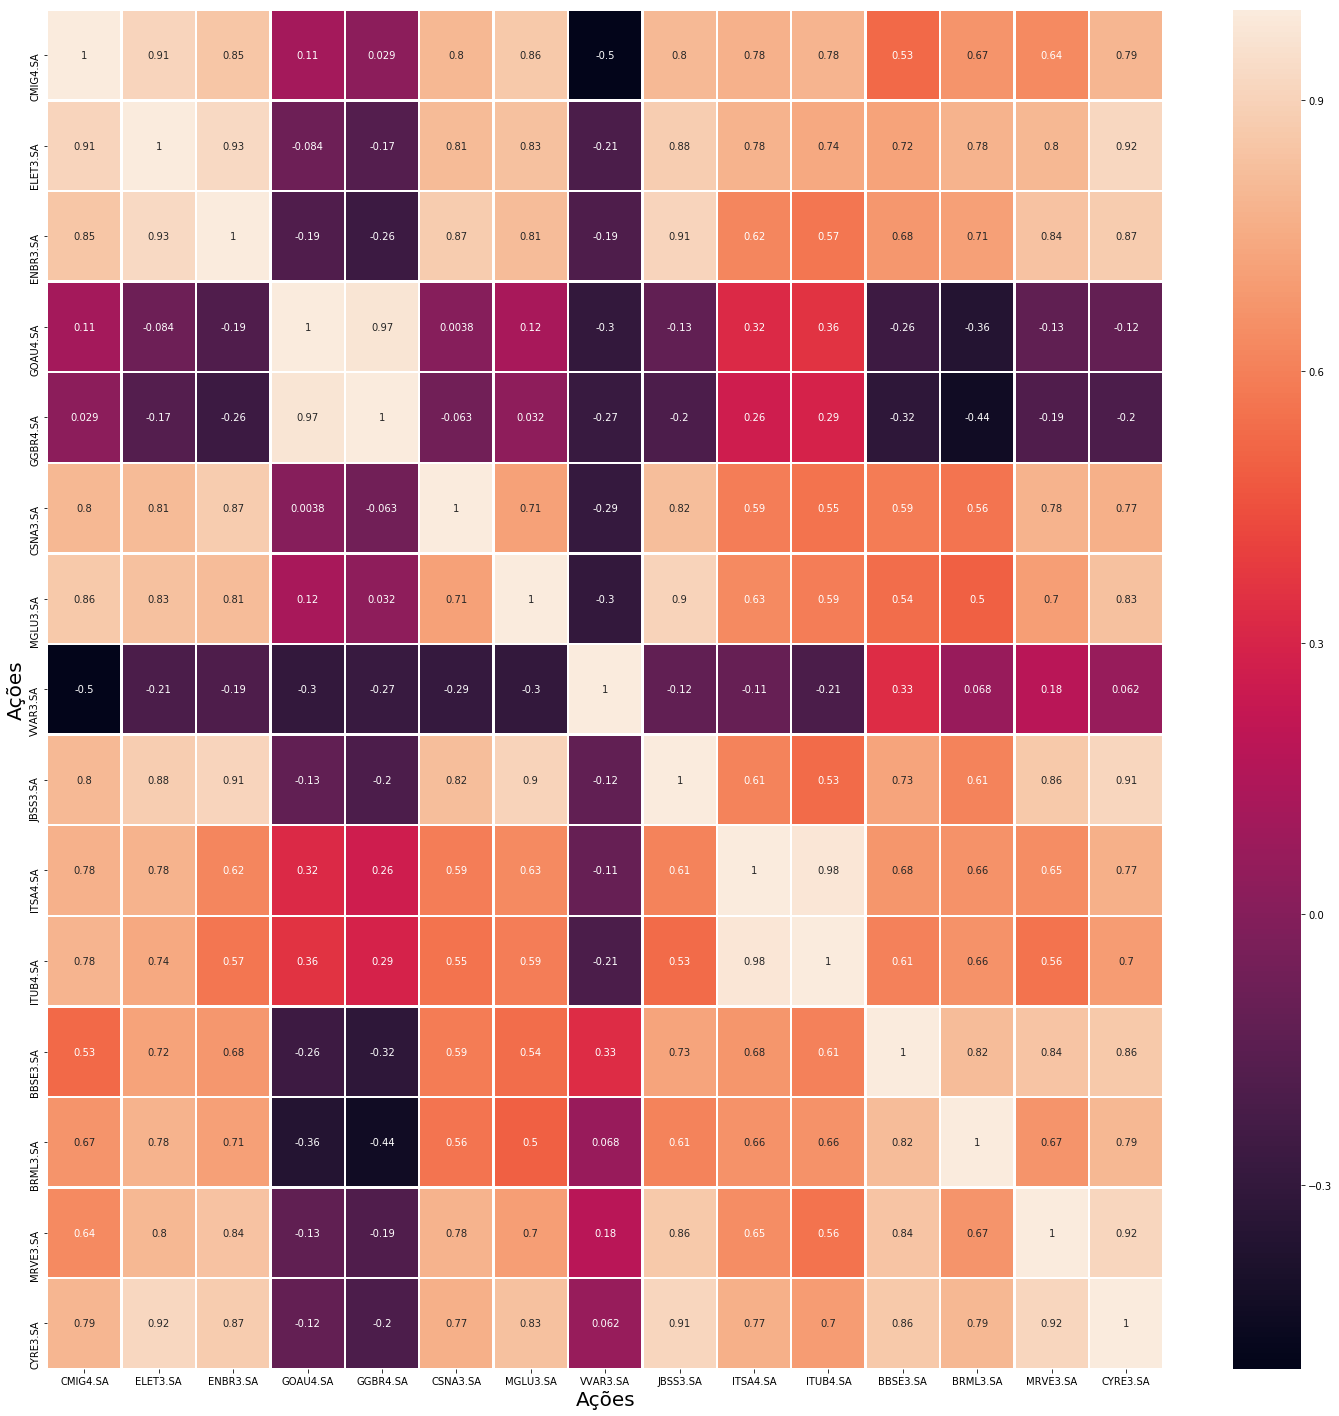

In [16]:
%matplotlib inline 
fig = plt.subplots(figsize=(25,25))
ax2=plt.subplot(1,1,1)  
sns.heatmap(Correlacao15, annot=True, linewidths=1.5, ax=ax2)

ax2.set_ylabel("Ações",fontsize=20)  
ax2.set_xlabel("Ações",fontsize=20)  

In [17]:
#NOME DOS 15 ATIVOS SELECIONADOS
nome_acoes_selecionadas = nome_acoes_IEE + nome_acoes_INDX + nome_acoes_ICON + nome_acoes_IDIV + nome_acoes_IMOB
nome_acoes_selecionadas

['CMIG4.SA',
 'ELET3.SA',
 'ENBR3.SA',
 'GOAU4.SA',
 'GGBR4.SA',
 'CSNA3.SA',
 'MGLU3.SA',
 'VVAR3.SA',
 'JBSS3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'BBSE3.SA',
 'BRML3.SA',
 'MRVE3.SA',
 'CYRE3.SA']

In [18]:
#CRIAR ITERAÇÕES DAS POSSÍVEIS CARTEIRAS
from itertools import combinations 
comb = combinations(nome_acoes_selecionadas, 5) 
COMB_15_5_ACOES = pd.DataFrame(list(comb))
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Ação1",1:"Ação2",2: "Ação3",3: "Ação4",4: "Ação5"}) 
COMB_15_5_ACOES

,Ação1,Ação2,Ação3,Ação4,Ação5
0,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,GGBR4.SA
1,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,CSNA3.SA
2,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,MGLU3.SA
3,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,VVAR3.SA
4,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,JBSS3.SA
5,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,ITSA4.SA
6,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,ITUB4.SA
7,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,BBSE3.SA
8,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,BRML3.SA
9,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,MRVE3.SA


In [19]:
#BUSCAR CORRELAÇÃO 2 A 2 
Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação1'][i]][COMB_15_5_ACOES['Ação2'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr1"})


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação1'][i]][COMB_15_5_ACOES['Ação3'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr2"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação1'][i]][COMB_15_5_ACOES['Ação4'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr3"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação1'][i]][COMB_15_5_ACOES['Ação5'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr4"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação2'][i]][COMB_15_5_ACOES['Ação3'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr5"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação2'][i]][COMB_15_5_ACOES['Ação4'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr6"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação2'][i]][COMB_15_5_ACOES['Ação5'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr7"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação3'][i]][COMB_15_5_ACOES['Ação4'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr8"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação3'][i]][COMB_15_5_ACOES['Ação5'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr9"})
COMB_15_5_ACOES


Coluna_corr = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Coluna_corr.append(Correlacao15[COMB_15_5_ACOES['Ação4'][i]][COMB_15_5_ACOES['Ação5'][i]])

Coluna_corr = pd.DataFrame(Coluna_corr)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Coluna_corr],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Corr10"})
COMB_15_5_ACOES

,Ação1,Ação2,Ação3,Ação4,Ação5,Corr1,Corr2,Corr3,Corr4,Corr5,Corr6,Corr7,Corr8,Corr9,Corr10
0,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,GGBR4.SA,0.911723,0.849505,0.111022,0.029310,0.926770,-0.083543,-0.171608,-0.189487,-0.262611,0.974475
1,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,CSNA3.SA,0.911723,0.849505,0.111022,0.796990,0.926770,-0.083543,0.811884,-0.189487,0.872097,0.003799
2,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,MGLU3.SA,0.911723,0.849505,0.111022,0.860064,0.926770,-0.083543,0.831417,-0.189487,0.813764,0.119889
3,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,VVAR3.SA,0.911723,0.849505,0.111022,-0.503217,0.926770,-0.083543,-0.207748,-0.189487,-0.193356,-0.299551
4,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,JBSS3.SA,0.911723,0.849505,0.111022,0.801886,0.926770,-0.083543,0.881630,-0.189487,0.906958,-0.125388
5,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,ITSA4.SA,0.911723,0.849505,0.111022,0.776591,0.926770,-0.083543,0.780921,-0.189487,0.622982,0.323376
6,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,ITUB4.SA,0.911723,0.849505,0.111022,0.782976,0.926770,-0.083543,0.741987,-0.189487,0.568932,0.359857
7,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,BBSE3.SA,0.911723,0.849505,0.111022,0.527190,0.926770,-0.083543,0.723644,-0.189487,0.678712,-0.261608
8,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,BRML3.SA,0.911723,0.849505,0.111022,0.666627,0.926770,-0.083543,0.782697,-0.189487,0.711465,-0.361760
9,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,MRVE3.SA,0.911723,0.849505,0.111022,0.635795,0.926770,-0.083543,0.796806,-0.189487,0.839642,-0.131754


In [20]:
#CÁLCULO DA MÉDIA E DESVIO PADRÃO DAS CORRELAÇÕES DAS CARTEIRAS
Media = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Media.append(abs(COMB_15_5_ACOES.loc[i][5:15]).mean())

Media = pd.DataFrame(Media)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Media],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Média"})

COMB_15_5_ACOES

Desv = []
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    Desv.append(COMB_15_5_ACOES.loc[i][5:15].std())

Desv = pd.DataFrame(Desv)
COMB_15_5_ACOES = pd.concat([COMB_15_5_ACOES,Desv],axis=1) 
COMB_15_5_ACOES = COMB_15_5_ACOES.rename(columns = {0: "Desvio"})
COMB_15_5_ACOES

,Ação1,Ação2,Ação3,Ação4,Ação5,Corr1,Corr2,Corr3,Corr4,Corr5,Corr6,Corr7,Corr8,Corr9,Corr10,Média,Desvio
0,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,GGBR4.SA,0.911723,0.849505,0.111022,0.029310,0.926770,-0.083543,-0.171608,-0.189487,-0.262611,0.974475,0.451005,0.533087
1,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,CSNA3.SA,0.911723,0.849505,0.111022,0.796990,0.926770,-0.083543,0.811884,-0.189487,0.872097,0.003799,0.555682,0.472717
2,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,MGLU3.SA,0.911723,0.849505,0.111022,0.860064,0.926770,-0.083543,0.831417,-0.189487,0.813764,0.119889,0.569718,0.462019
3,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,VVAR3.SA,0.911723,0.849505,0.111022,-0.503217,0.926770,-0.083543,-0.207748,-0.189487,-0.193356,-0.299551,0.427592,0.549314
4,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,JBSS3.SA,0.911723,0.849505,0.111022,0.801886,0.926770,-0.083543,0.881630,-0.189487,0.906958,-0.125388,0.578791,0.498276
5,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,ITSA4.SA,0.911723,0.849505,0.111022,0.776591,0.926770,-0.083543,0.780921,-0.189487,0.622982,0.323376,0.557592,0.427222
6,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,ITUB4.SA,0.911723,0.849505,0.111022,0.782976,0.926770,-0.083543,0.741987,-0.189487,0.568932,0.359857,0.552580,0.422164
7,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,BBSE3.SA,0.911723,0.849505,0.111022,0.527190,0.926770,-0.083543,0.723644,-0.189487,0.678712,-0.261608,0.526320,0.475954
8,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,BRML3.SA,0.911723,0.849505,0.111022,0.666627,0.926770,-0.083543,0.782697,-0.189487,0.711465,-0.361760,0.559460,0.504479
9,CMIG4.SA,ELET3.SA,ENBR3.SA,GOAU4.SA,MRVE3.SA,0.911723,0.849505,0.111022,0.635795,0.926770,-0.083543,0.796806,-0.189487,0.839642,-0.131754,0.547605,0.477366


In [37]:
#Excluir as carteiras com média de correlação superior a 0,3
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    if(COMB_15_5_ACOES['Média'][i] > 0.3):
        COMB_15_5_ACOES.drop(i, inplace=True, axis=0)

COMB_15_5_ACOES.reset_index(inplace = True, drop = True)

#Excluir as carteiras com desvio padrão de correlação superior a 0,3
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    if(COMB_15_5_ACOES['Desvio'][i] > 0.3):
        COMB_15_5_ACOES.drop(i, inplace=True, axis=0)

COMB_15_5_ACOES.reset_index(inplace = True, drop = True)

#SELECIONA A CARTEIRA COM MENOR MÉDIA
MEDIA = 1
for i in range(len(COMB_15_5_ACOES['Ação1'])):
    if(COMB_15_5_ACOES['Média'][i] < MEDIA):
        MEDIA = COMB_15_5_ACOES['Média'][i]
        MEDIA_index = i

CARTEIRA_FINAL_SELECIONADA = COMB_15_5_ACOES.loc[MEDIA_index][0:5]
CARTEIRA_FINAL_SELECIONADA

Ação1    USIM5.SA
Ação2    GGBR4.SA
Ação3    VVAR3.SA
Ação4    ITSA4.SA
Ação5    MRVE3.SA
Name: 2, dtype: object

<div id="Tópico 1">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 2: Identifique a correlação entre os preços e os retornos dos 15 (quinze) ativos coletados na questão anterior. Em seguida, identifique os cinco papeis com menor correlação e retorno médio positivo no período de 24 meses.</h></a></h>   
</div> </div> 

In [ ]:
a=1

<div id="Tópico 2">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 3: Com relação aos 5 (cinco) papéis da questão 2, apresente: (i) os gráficos de preço no formato candlestick, (ii) os gráficos de retorno mês, (iii) o índice Sharpe e o (iv) fator Beta com relação ao índice Bovespa.</h></a></h>   
</div> </div> 

## Retorno

In [128]:
import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

acoes=['CMIG4','ELET3','ENBR3','USIM5','GOAU4']


def download_acao_m(ticker,data_inicio,data_fim):
    ticker = ticker + '.SA'
    return pdr.get_data_yahoo(ticker, 
                          start=data_inicio, 
                          end=data_fim,interval='m')

def download_acao(ticker,data_inicio,data_fim):
    ticker = ticker + '.SA'
    return pdr.get_data_yahoo(ticker, 
                          start=data_inicio, 
                          end=data_fim)
acoes_df = []
for acao in acoes:
    acoes_df += [(acao,download_acao(acao,datetime.datetime(2017,9,1),datetime.datetime(2019,9,1)))]

In [129]:
from dateutil.relativedelta import *
print(acoes_df[0][0])
start=datetime.datetime(2017,9,1).date()
for i in range(25):
    print(start)
    start = start+relativedelta(months=+1)

CMIG4
2017-09-01
2017-10-01
2017-11-01
2017-12-01
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01
2018-12-01
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01


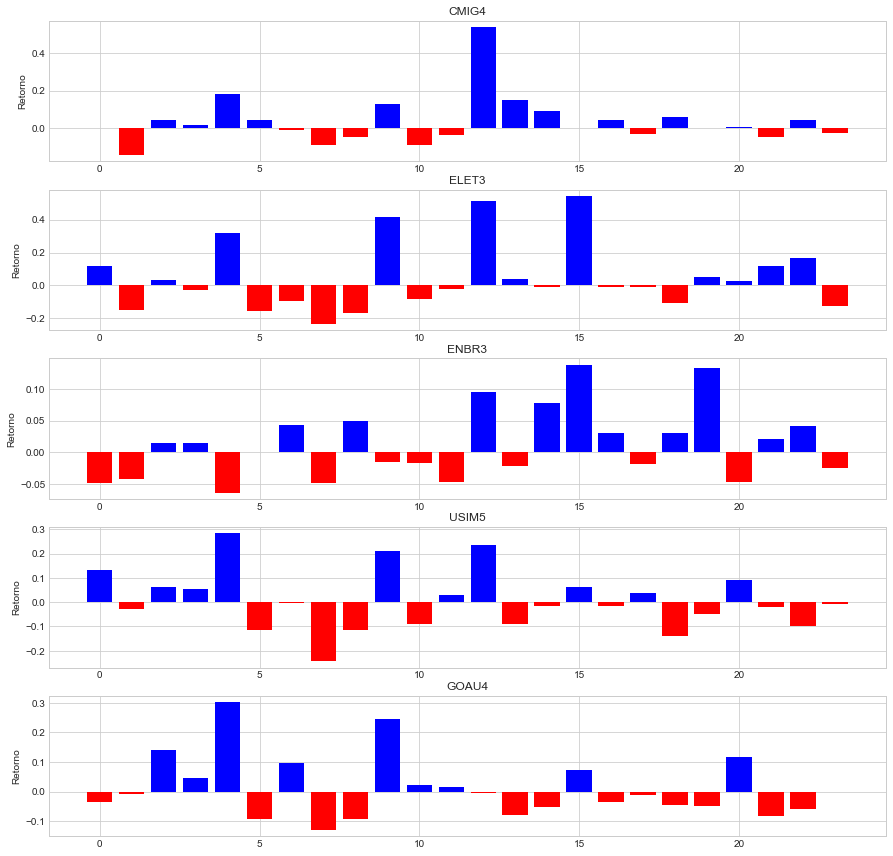

In [130]:
acoes_mes_df = []
for acao in acoes:
    acoes_mes_df += [(acao,download_acao_m(acao,datetime.datetime(2017,9,1),datetime.datetime(2019,9,1)))]
    
count = 0
fig, axes = plt.subplots(len(acoes_mes_df), 1, figsize=(15, 15))
for acao in acoes_mes_df:
    
    retorno = acao[1]['Close'][1:].values/acao[1]['Close'][:-1].values-1
    retorno[retorno < 0]=0
    axes[count].bar(np.arange(len(retorno)),retorno,color='blue')
    
    retorno = acao[1]['Close'][1:].values/acao[1]['Close'][:-1].values-1
    retorno[retorno > 0] = 0
    axes[count].bar(np.arange(len(retorno)),retorno,color='red')
    
    axes[count].set_title(acao[0])
    axes[count].set_ylabel("Retorno")
    count +=1

plt.show()

In [131]:
for acao in acoes_df:
    retorno = acao[1]['Close'][1:].values/acao[1]['Close'][:-1].values-1
    acao[1]['Retorno']=100*np.concatenate(([0], retorno), axis=0)

## Sharpe

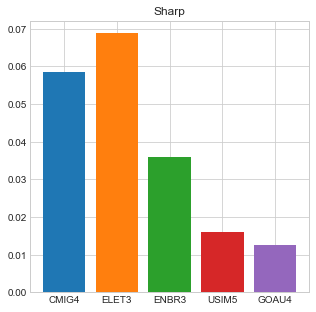

In [132]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
import numpy as np
for acao in acoes_df:
    risco = np.std(acao[1]['Retorno'])
    retorno = np.mean(acao[1]['Retorno'])
    ativo_livre_risco = 5/(12*100)
    sharpe = (retorno - ativo_livre_risco)/risco
    axes.set_title('Sharp')
    axes.bar(acao[0],sharpe)

## Candle stick

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


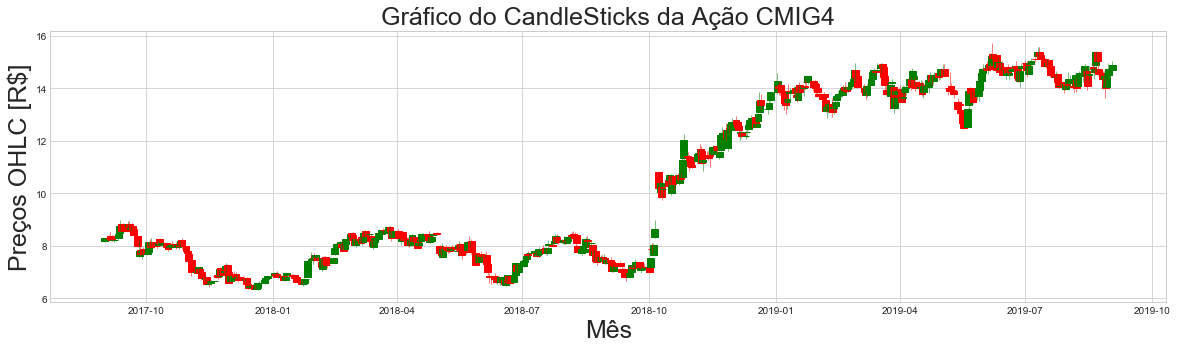

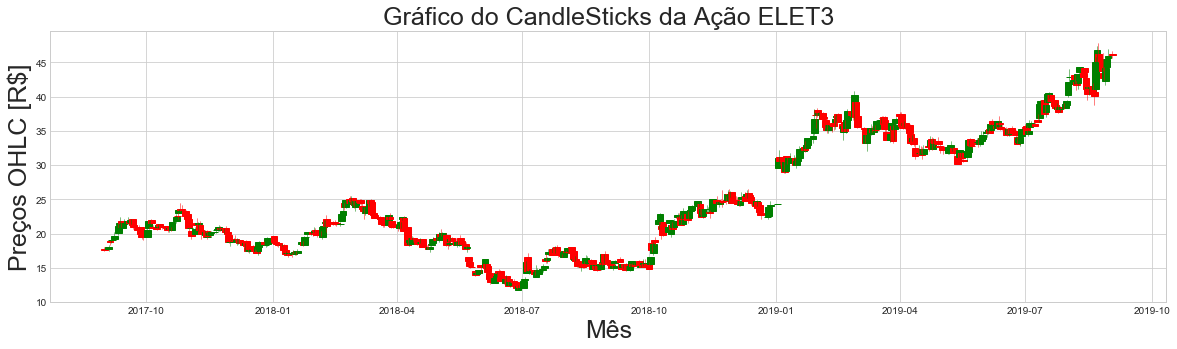

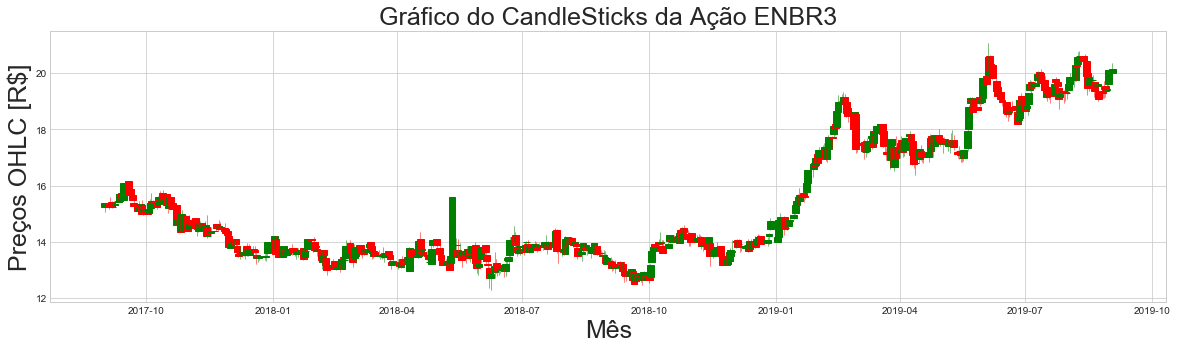

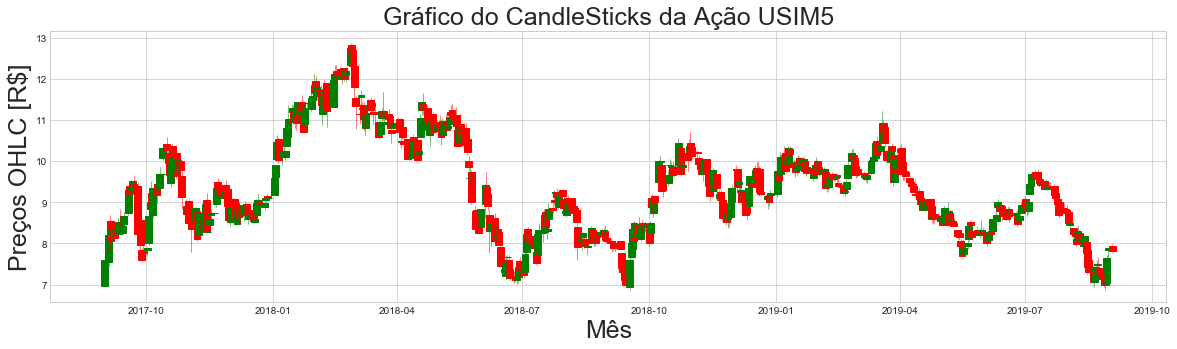

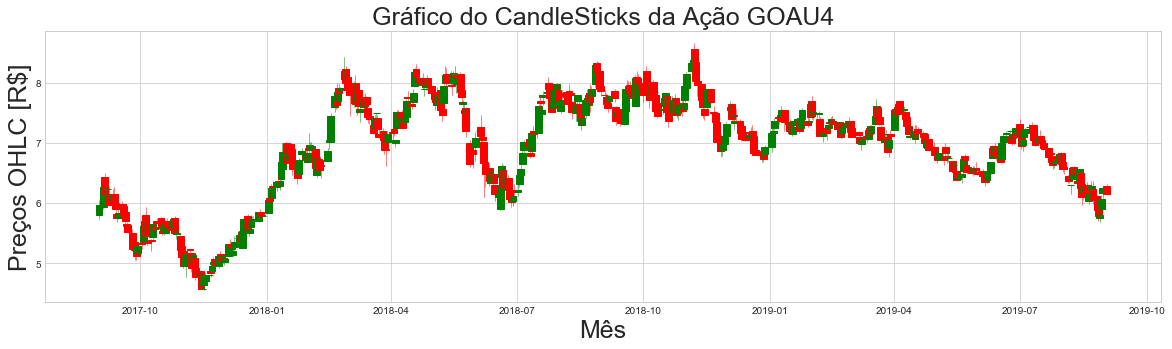

In [133]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader as web
from mpl_finance import candlestick_ohlc
import pandas as pd

for acao in acoes_df:
    fig = plt.subplots(figsize=(20,5))

    plt.style.use('seaborn-whitegrid')
    
    nova_acao = pd.DataFrame(index=acao[1].index)
    nova_acao['open']=acao[1]['Open'].values
    nova_acao['high']=acao[1]['High'].values
    nova_acao['low']=acao[1]['Low'].values
    nova_acao['close']=acao[1]['Close'].values
    
    nova_acao.reset_index(inplace=True)
    nova_acao['Date'] = nova_acao['Date'].map(mdates.date2num)

    ax = plt.subplot(111)
    candlestick_ohlc(ax, nova_acao.values, width=5, colorup='g', colordown='r',alpha=1)
    ax.legend(loc='upper left')
    ax.set_xlabel("Dia",fontsize=25)
    ax.set_ylabel('Preços OHLC [R$]',fontsize=25)
    ax.set_title('Gráfico do CandleSticks da Ação '+acao[0],fontsize=25) 
    ax.xaxis_date()

## Beta

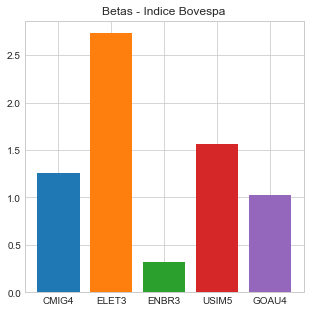

In [134]:
for acao in acoes_mes_df:
    retorno = acao[1]['Close'][1:].values/acao[1]['Close'][:-1].values-1
    acao[1]['Retorno']=100*np.concatenate(([0], retorno), axis=0)
    
b3_index = pdr.get_data_yahoo('^BVSP', start=datetime.datetime(2017,9,1), end=datetime.datetime(2019,9,1),interval='m')
# retorno_b3 = b3_index['Close'].diff().dropna()
retorno_b3 = b3_index['Close'][1:].values/b3_index['Close'][:-1].values-1

b3_acao_retorno = pd.DataFrame()
b3_acao_retorno['B3'] = 100*np.concatenate(([0], retorno_b3), axis=0)
# b3_acao_retorno['B3'] = retorno_b3.values

for acao in acoes_mes_df:
    b3_acao_retorno[acao[0]] = acao[1]['Retorno'].dropna().values
    
cov_b3_acoes = b3_acao_retorno.cov()

variancia_b3 = b3_acao_retorno['B3'].var()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for acao in acoes:
    ax.set_title('Betas - Indice Bovespa')
    beta = cov_b3_acoes[acao]['B3']/variancia_b3
    ax.bar(acao,beta)

<div id="Tópico 3">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 4: Considerando os 5 (cinco) papeis escolhidos, na questão 2, aplique a Teoria do Portfólio Moderno de Markowitz. Nesse sentido, (i) Identifique o diagrama Risco x Retorno, (ii) a curva de eficiência, (iii) o portfólio de menor risco e o (iv) portfólio com maior índice Sharpe.</h></a></h>   
</div> </div> 

## Diagrama risco x retorno

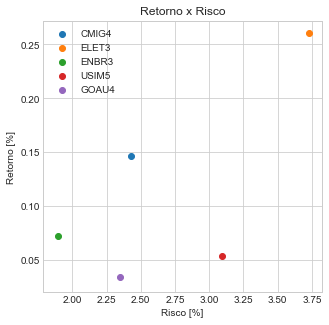

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for acao in acoes_df:
    ax.set_title('Retorno x Risco')
    ax.set_ylabel("Retorno [%]")
    ax.set_xlabel("Risco [%]")
    ax.scatter(np.std(acao[1]['Retorno']),np.mean(acao[1]['Retorno']), label=acao[0])
    ax.legend()

In [136]:
retorno_acoes = pd.DataFrame()
for acao in acoes_df:
    retorno_acoes[acao[0]] = acao[1]['Retorno']

In [137]:
media_retornos = retorno_acoes.mean()
covariancia_retornos = retorno_acoes.cov()
risco_acoes = retorno_acoes.std()

In [138]:
import random
# Com pesos aleatórios
retorno_portifolio = []
risco_portifolio = []
quantidade_ativos = 5

for i in range(1000):
    pesos = [random.randint(0,10000) for i in range(1,quantidade_ativos+1)]
    s = sum(pesos)
    pesos = [ i/s for i in pesos ]
    retorno_portifolio.append(np.dot(pd.DataFrame(pesos).transpose(),media_retornos)[0])
    risco_portifolio.append(np.sqrt(np.dot(np.dot(pd.DataFrame(pesos).transpose(),covariancia_retornos),pd.DataFrame(pesos)))[0][0])

In [139]:
matrix_de_uns = np.ones(len(retorno_acoes.columns))

## 1^T C^−1 μ
b=np.dot(pd.DataFrame(matrix_de_uns).transpose(),np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(media_retornos)))
## μ^T C^−1 μ
a=np.dot(pd.DataFrame(media_retornos).transpose(),np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(media_retornos)))
## μ^T C^−1 1
c=np.dot(pd.DataFrame(media_retornos).transpose(),np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(matrix_de_uns)))
## 1^T C^−1 1
d=np.dot(pd.DataFrame(matrix_de_uns).transpose(),np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(matrix_de_uns)))

target_mus=np.arange(0,5,0.002) 

risk_at_target_mus=np.zeros(len(target_mus)) # ricos da média do ativo ?
for i in range(0, len(target_mus)):
    target_mu=target_mus[i]
    v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(media_retornos))
    v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(matrix_de_uns))
    v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
    peso_ideal=(v1+v2)/v3
    risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(peso_ideal).transpose(),covariancia_retornos),pd.DataFrame(peso_ideal)))**0.5


Text(0.5, 0, 'Risco do Capital [R$]')

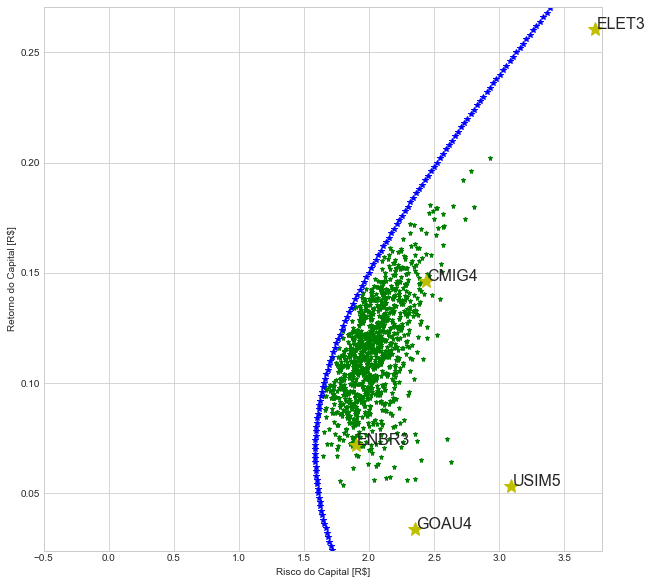

In [140]:
fig = plt.subplots(figsize=(10, 10))

for p in range(0,len(retorno_portifolio)):
    plt.plot(risco_portifolio[p], retorno_portifolio[p], 'g*', markersize=5.0)
    
plt.axis([-0.5,np.max(risco_acoes)+0.05,np.min(media_retornos)-0.01,np.max(media_retornos)+.01])


for p in range(0,len(risco_acoes)):
    plt.plot(risco_acoes[p], media_retornos[p], 'y*', markersize=15.0) 
    plt.text(risco_acoes[p]+0.01, media_retornos[p],risco_acoes.index[p] , fontsize=16)
    

plt.plot(0,0,'r*')
plt.plot(risk_at_target_mus,target_mus,'b*')
plt.ylabel('Retorno do Capital [R$]')
plt.xlabel('Risco do Capital [R$]')

In [141]:
pesos_risco_minimo=np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(matrix_de_uns))/d
media_risco_minimo=np.dot(pesos_risco_minimo.transpose(),media_retornos.values)
risk_minrisk=(np.dot(np.dot(pd.DataFrame(pesos_risco_minimo).transpose(),covariancia_retornos),pd.DataFrame(pesos_risco_minimo)))**0.5

Os pesos dos ativos no portifólio de menor risco: [0.23, -0.06, 0.55, -0.01, 0.29]


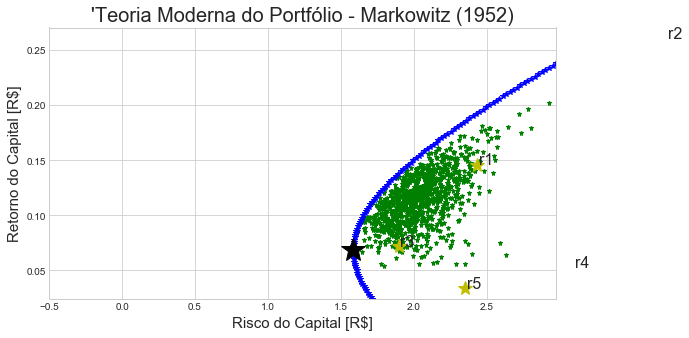

In [142]:
fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,2, 1) 


for p in range(0,len(retorno_portifolio)):
    plt.plot(risco_portifolio[p], retorno_portifolio[p], 'g*', markersize=5.0)  


ax1.plot(0,0,'r*')
ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,media_risco_minimo,'k*',markersize=25)

plt.axis([-0.5,np.max(risco_portifolio)+0.05,np.min(media_retornos)-0.01,np.max(media_retornos)+.01])

for p in range(0,len(risco_acoes)):
    plt.plot(risco_acoes[p], media_retornos[p], 'y*', markersize=15.0) 
    plt.text(risco_acoes[p]+0.01, media_retornos[p],'r'+str(p+1) , fontsize=16)

    
if 'port' in retorno_acoes.columns: 
    retorno_acoes.drop(columns=['port'],inplace=True)
    
retorno_acoes['port']=pd.DataFrame(retorno_acoes*[pesos_risco_minimo[i][0] for i in range(len(pesos_risco_minimo))]).sum(axis=1)
pesos=[pesos_risco_minimo[i][0] for i in range(len(pesos_risco_minimo))]+[1]
ax1.set_xlabel("Risco do Capital [R$]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [R$]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)
print('Os pesos dos ativos no portifólio de menor risco:',[round(pesos_risco_minimo[i][0],2) for i in range(len(pesos_risco_minimo))])
# plt.ylim(bottom=-.1,top=.3)
# plt.xlim(left=1, right=3) 

Text(0.5, 1.0, "'Teoria Moderna do Portfólio - Markowitz (1952)")

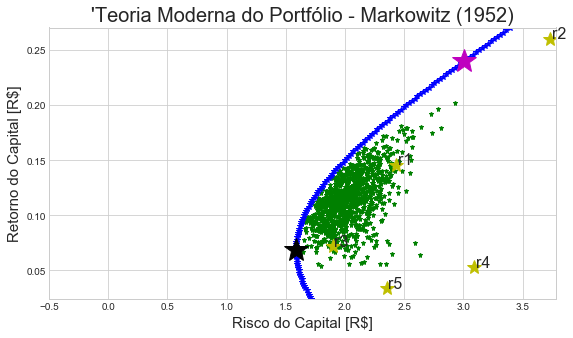

In [143]:
rf=0.002
temp=np.dot(np.linalg.inv(covariancia_retornos),pd.DataFrame(media_retornos-np.dot(matrix_de_uns,rf)))
qm=temp/temp.sum()
mu_m=np.dot(qm.transpose(),media_retornos)
sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),covariancia_retornos),pd.DataFrame(qm)))**0.5

fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retorno_portifolio)):
    plt.plot(risco_portifolio[p], retorno_portifolio[p], 'g*', markersize=5.0)  

ax1.plot(0,0,'r*')
ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,media_risco_minimo,'k*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)


plt.axis([-0.5,np.max(risco_acoes)+0.05,np.min(media_retornos)-0.01,np.max(media_retornos)+.01])

for p in range(0,len(risco_acoes)):
    plt.plot(risco_acoes[p], media_retornos[p], 'y*', markersize=15.0) 
    plt.text(risco_acoes[p]+0.01, media_retornos[p],'r'+str(p+1) , fontsize=16)

if 'port' in retorno_acoes.columns: 
    retorno_acoes.drop(columns=['port'],inplace=True)
    
retorno_acoes['port']=pd.DataFrame(retorno_acoes*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [R$]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [R$]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

In [144]:
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])

Os pesos dos ativos no portifólio de menor risco: [0.64, 0.58, 0.18, -0.25, -0.16]


In [ ]:
count = 0
fig, axes = plt.subplots(len(acoes_df), 1, figsize=(15, 15))
for acao in acoes_df:
#     np.log(acao[1]['Close'][1:].values)-np.log(acao[1]['Close'][0:-1].values)
#     retorno = acao[1]['Close'].diff().dropna()
#     retorno = acao[1]['Close'].pct_change().dropna()
#     df['p1'][1:].values/df['p1'][0:-1].values-1

    retorno = acao[1]['Close'][1:].values/acao[1]['Close'][:-1].values-1
    
    acao[1]['Retorno']=100*np.concatenate(([0], retorno), axis=0)
    
#     acao[1]['Retorno'] = retorno
    retorno[retorno < 0]=0
    axes[count].bar(np.arange(len(retorno)),retorno,color='blue')

#     retorno = acao[1]['Close'].diff().dropna()
    retorno = acao[1]['Close'][1:].values/acao[1]['Close'][:-1].values-1
    retorno[retorno > 0] = 0
    axes[count].set_title(acao[0])
    axes[count].bar(np.arange(len(retorno)),retorno,color='red')
    axes[count].set_ylabel("Retorno")
    count +=1

plt.show()